
1. Questions I want to answer:
- What kind of consumers did this insurance attract?
- What suggestions we can give to improve sales?
- How to construct models to make prediction?
2. What I did:
- use data visualization to explore the relationship between customers characteristics and whether the customer bought the insurance or not
- conduct statistics tests to futher explore the relationship
- Use logistic regression to make prediction

In [2]:
# import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from scipy.stats import ttest_ind

In [251]:
df=pd.read_csv('TravelInsurancePrediction.csv').drop(columns=['Unnamed: 0'])
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


# EDA

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


- Background:\
A Tour & Travels Company is Offering Travel Insurance Package To Their Customers.The new insurance package also includes Covid Cover.The company requires to know which customers would be interested to buy it based on its database history.
The insurance was offered to some of the customers in 2019, and the given data has been extracted from the performance/sales of the package during that period.

- This dataset contains:\
Age- Age Of The Customer\
Employment Type- The Sector In Which Customer Is Employed\
GraduateOrNot- Whether The Customer Is College Graduate Or Not\
AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]\
FamilyMembers- Number Of Members In Customer's Family\
ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.\
FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].\
EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]\
TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

- Datasource: https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data  

In [67]:
#Missing value 

In [5]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

- There is no missing value in this dataset.

In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [24]:
buy_count=df['TravelInsurance'].sum()
buy_count

710

In [27]:
buy_per=1-buy_count/1987
buy_per

0.6426774031202818

- There are 1987 pieces of customers' data.64% of them bought the insurance.


## Did customer's age infulence consumer behavior?

In [7]:
df['Age'].unique()

array([31, 34, 28, 25, 33, 26, 32, 29, 35, 30, 27], dtype=int64)


**Assumption: The insurance attracts people aged 25 to 35.**

Text(0.5, 1.0, 'Age Distribution')

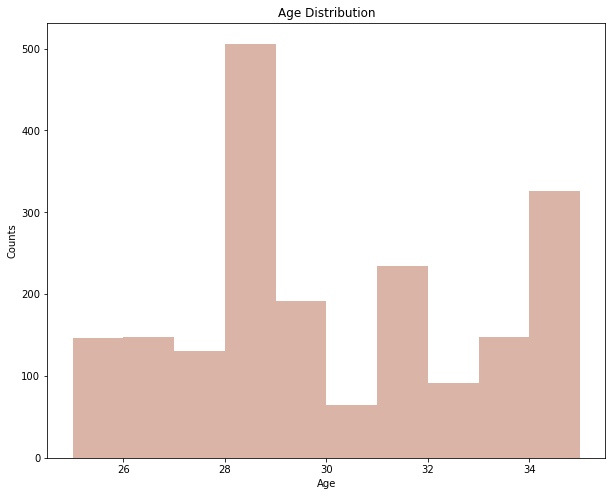

In [8]:
fig = plt.figure(figsize=(10,8))  
plt.hist(df['Age'],  density=False,color='#b66a50',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title("Age Distribution") 

In [7]:
buy=df[df['TravelInsurance']==1]
not_buy=df[df['TravelInsurance']==0]

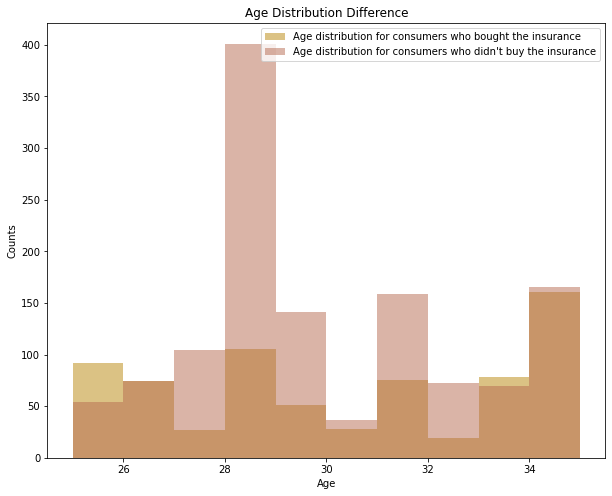

In [47]:
fig = plt.figure(figsize=(10,8))  
plt.hist(buy['Age'], color='#B8860B',alpha=0.5)
plt.hist(not_buy['Age'], color='#b66a50',alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.legend(['Age distribution for consumers who bought the insurance',"Age distribution for consumers who didn't buy the insurance"])
plt.title("Age Distribution Difference")  
plt.show() 


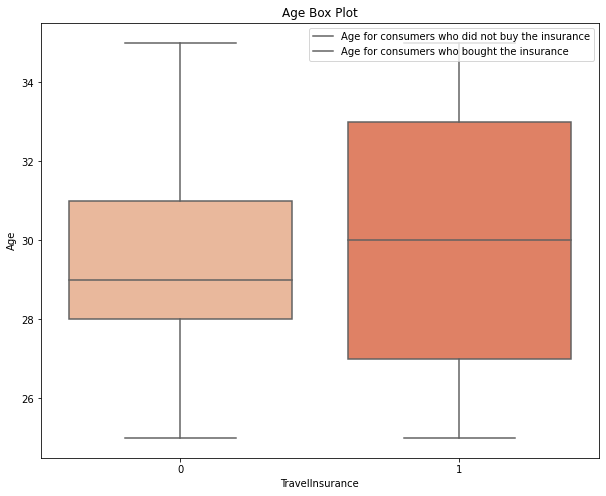

In [71]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='Age',x='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['Age for consumers who did not buy the insurance',"Age for consumers who bought the insurance"],loc='upper right')
plt.title("Age Box Plot")  
plt.show()

- The boxplot shows that, compared with the age range for consumers who did not buy insurances, the age range for consumers who bought the insurance was wider.
- The median age for consumers who bought the insurance was higher than the mdeian age for consumers who did not,

In [74]:
 
ttest_ind(buy['Age'], not_buy['Age'], equal_var = False)

Ttest_indResult(statistic=2.554217515314082, pvalue=0.010764311885970662)

- We are 95% confident that there is a difference between the mean age for consumers who bought the insurance and who did not.

In [44]:
buy['Age'].mean()

29.888732394366198

In [45]:
not_buy['Age'].mean()

29.517619420516837

- Although the t-test shows that there is a difference between mean age for consumers who bought the insurance and who did not, it is still hard to conclude that age make a difference as the mean difference was small(29.88-29.52=0.36), and they can both be rounded to be 30 as they are age.

**The analysis shows that it seems that customer behavior has nothing to do with age. However, whether the mixture of age and other factors will lead to changes in customer behavior still needs to be studied.**

## Did employment type influence consumer buying behavior?

In [49]:
df['Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

- Two employment types: Government Sector and Private Sector/Self Employed

In [50]:
gov=df[df['Employment Type']=='Government Sector']
pri=df[df['Employment Type']=='Private Sector/Self Employed']

In [54]:
per_buy_gov=gov['TravelInsurance'].mean()*100
per_buy_gov

24.561403508771928

In [55]:
per_buy_pri=pri['TravelInsurance'].mean()*100
per_buy_pri

40.22582921665491

In [56]:
per=[per_buy_gov,per_buy_pri]

In [57]:
insurance_groupby_employment= {'Employment Type': ['Government Sector', 'Private Sector/Self Employed'],
        '% of insurance bought': per
       }
insurance_groupby_employment= pd.DataFrame(insurance_groupby_employment)
insurance_groupby_employment

,Employment Type,% of insurance bought
0,Government Sector,24.561404
1,Private Sector/Self Employed,40.225829


Text(0.5, 1.0, '% of insurance bought group by Employment Type')

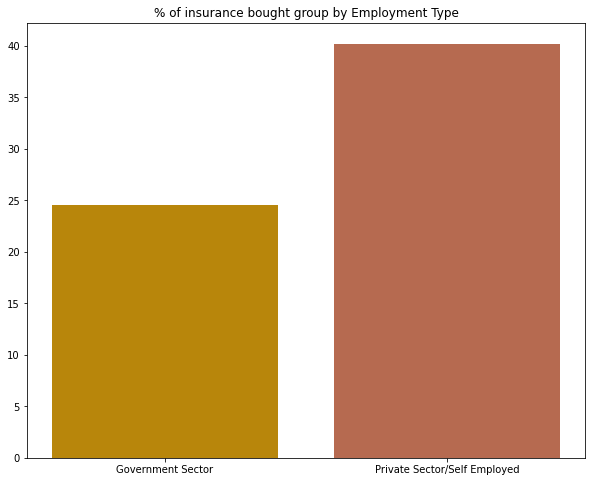

In [58]:
fig = plt.figure(figsize=(10,8))  
color=['#B8860B','#b66a50']
plt.bar(insurance_groupby_employment['Employment Type'], insurance_groupby_employment['% of insurance bought'],color=color)
plt.title("% of insurance bought group by Employment Type")  

- It seems that for consumers from Private Sector/Self Employed, there was a higher probability for them to buy the insurance.

In [59]:
ttest_ind(gov['TravelInsurance'], pri['TravelInsurance'], equal_var = False)

Ttest_indResult(statistic=-7.037476953442845, pvalue=3.30168328082835e-12)

- Statistic test shows that there is a difference in expected buying probability between consumers from government sector and private sector/self employed.

**Employment type makes a difference**

## Did education level influence consumer behavior?

In [60]:
df['GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [62]:
graduate=df[df['GraduateOrNot']=='Yes']
no_graduate=df[df['GraduateOrNot']=='No']

In [66]:
per_buy_gra=graduate['TravelInsurance'].mean()*100
per_buy_gra

36.11111111111111

In [73]:
buy_no_gra=no_graduate['TravelInsurance'].mean()*100
buy_no_gra

33.559322033898304

In [67]:
insurance_groupby_edu= {'GraduateOrNot': ['Yes', 'No'],
        '% of insurance bought': [per_buy_gra,per_buy_no_gra]
       }
insurance_groupby_edu= pd.DataFrame(insurance_groupby_edu)
insurance_groupby_edu

,GraduateOrNot,% of insurance bought
0,Yes,36.111111
1,No,33.559322


Text(0.5, 1.0, '% of insurance bought group by graduate or not')

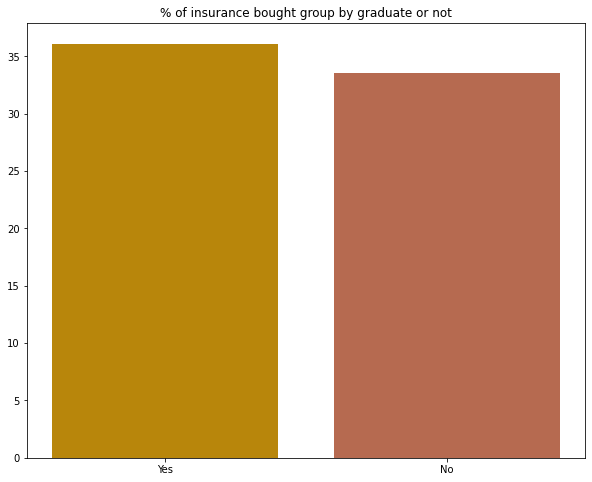

In [68]:
fig = plt.figure(figsize=(10,8))  
color=['#B8860B','#b66a50']
plt.bar(insurance_groupby_edu['GraduateOrNot'], insurance_groupby_edu['% of insurance bought'],color=color)
plt.title("% of insurance bought group by graduate or not")  

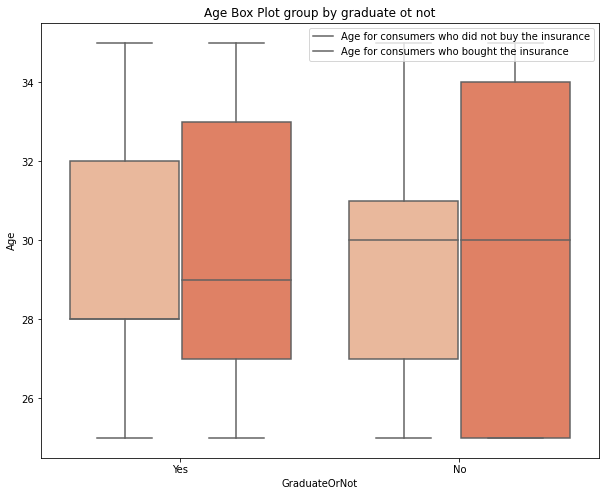

In [102]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(x='GraduateOrNot',y='Age',hue='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['Age for consumers who did not buy the insurance',"Age for consumers who bought the insurance"],loc='upper right')
plt.title("Age Box Plot group by graduate ot not")  
plt.show()

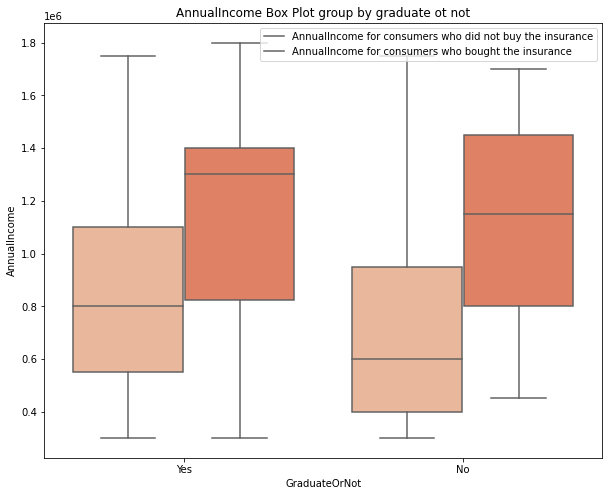

In [103]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='AnnualIncome',x='GraduateOrNot',hue='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['AnnualIncome for consumers who did not buy the insurance',"AnnualIncome for consumers who bought the insurance"],loc='upper right')
plt.title("AnnualIncome Box Plot group by graduate ot not")  
plt.show()

- For each eduation level group, people who purchased the insurance were ussually richer than people who did noy.

In [69]:
ttest_ind(graduate['TravelInsurance'], no_graduate['TravelInsurance'], equal_var = False)

Ttest_indResult(statistic=0.8530468209614321, pvalue=0.39413506741270277)

- Statistic test shows that there is not a significant difference in expected purchase probability between consumers who graduated from college and who did not.


## Did customer's annual income type influence consumer buying behavior?

In [28]:
df['AnnualIncome'].min()

300000

- "India’s per capita annual income in 2019-20 was ₹1,26,968, according to provisional estimates published on January 7. This average, given India’s large income inequality, is not representative of the earnings of average Indians."
(source: https://www.hindustantimes.com/india-news/number-theory-how-much-does-an-average-indian-earn-101610760612856.html)
- The top 20% of Indian households earn less than .1 lakh per annum per capita. ($ .1 lakh=1*10^5 $)\
(source: https://www.hindustantimes.com/india-news/number-theory-how-much-does-an-average-indian-earn-101610760612856.html)

**The dataset focus on wealth consumers since the mean annual income in this dataset is 300000 Rupees.**\
**Assumption：Target consumers of the insurance are rich people.**

Text(0.5, 1.0, 'AnnualIncome Distribution')

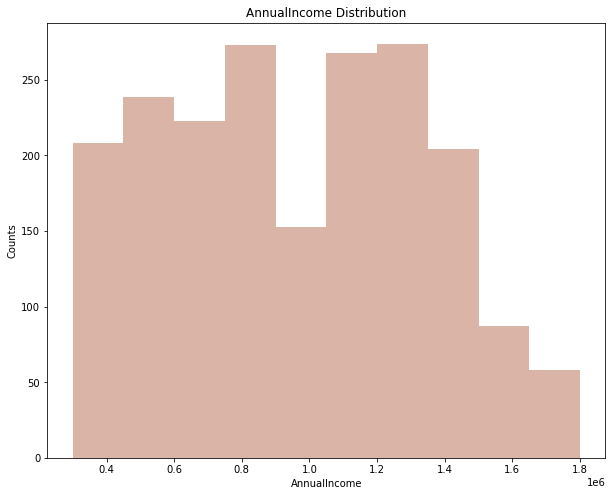

In [12]:
fig = plt.figure(figsize=(10,8))  
plt.hist(df['AnnualIncome'],  density=False,color='#b66a50',alpha=0.5)
plt.xlabel('AnnualIncome')
plt.ylabel('Counts')
plt.title("AnnualIncome Distribution") 

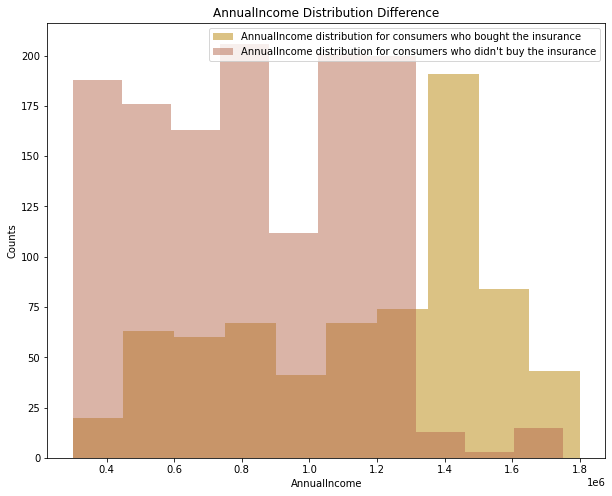

In [22]:
fig = plt.figure(figsize=(10,8))  
plt.hist(buy['AnnualIncome'], color='#B8860B',alpha=0.5)
plt.hist(not_buy['AnnualIncome'], color='#b66a50',alpha=0.5)
plt.xlabel('AnnualIncome')
plt.ylabel('Counts')
plt.legend(['AnnualIncome distribution for consumers who bought the insurance',"AnnualIncome distribution for consumers who didn't buy the insurance"])
plt.title("AnnualIncome Distribution Difference")  
plt.show() 


- The distribution shows that the income distributions for costumers who bought and did not buy the insurance were different.People with annual income under 1.3M Rupees usually tend not to buy the insurance.

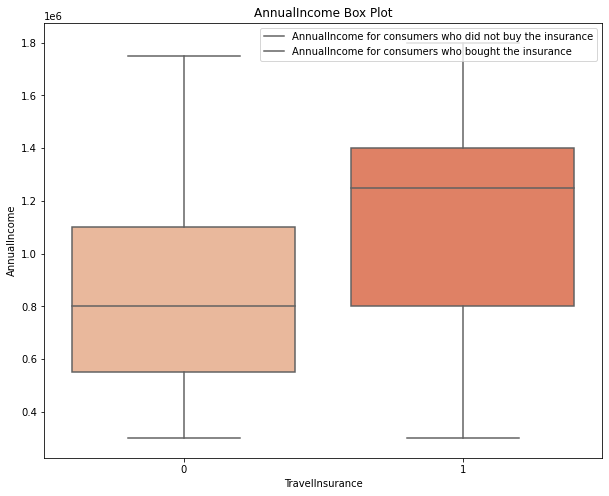

In [15]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='AnnualIncome',x='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['AnnualIncome for consumers who did not buy the insurance',"AnnualIncome for consumers who bought the insurance"],loc='upper right')
plt.title("AnnualIncome Box Plot")  
plt.show()

- Consumers who bought the insurance tend to have a higher annual income than consumers who did not.

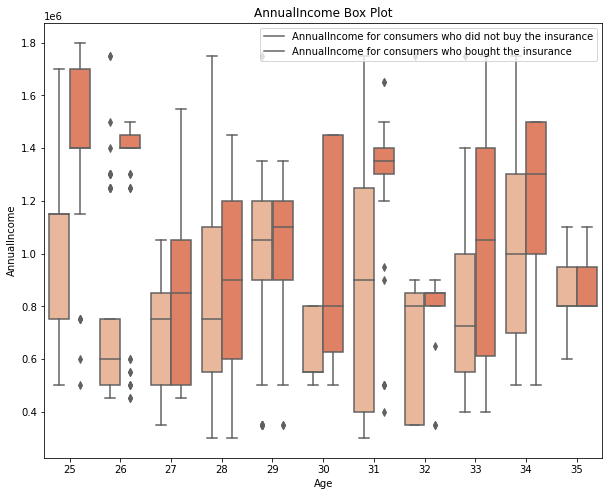

In [20]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='AnnualIncome',x='Age',hue='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['AnnualIncome for consumers who did not buy the insurance',"AnnualIncome for consumers who bought the insurance"],loc='upper right')
plt.title("AnnualIncome Box Plot")  
plt.show()

- For each age group, consumers who bought the insurance tend to have a higher annual income than consumers who did not.

In [37]:
ttest_ind(buy['AnnualIncome'], not_buy['AnnualIncome'], equal_var = False)

Ttest_indResult(statistic=18.55569596185316, pvalue=1.9420036604755432e-68)

- Statistics test shows that we are 95% confident that there is a difference between the mean annual income for consumers who bought the insurance and who did not.

**Annual income makes a great difference! This insurance attracts relatively wealth people.**

## Did the size of a family influence consumer behavior?

In [30]:
df['FamilyMembers'].unique()

array([6, 7, 4, 3, 8, 9, 5, 2], dtype=int64)

**The dataset does not include single people data.**\
**Assumption：Singles are not the target customers of this insurance.**

Text(0.5, 1.0, 'FamilyMembers Distribution')

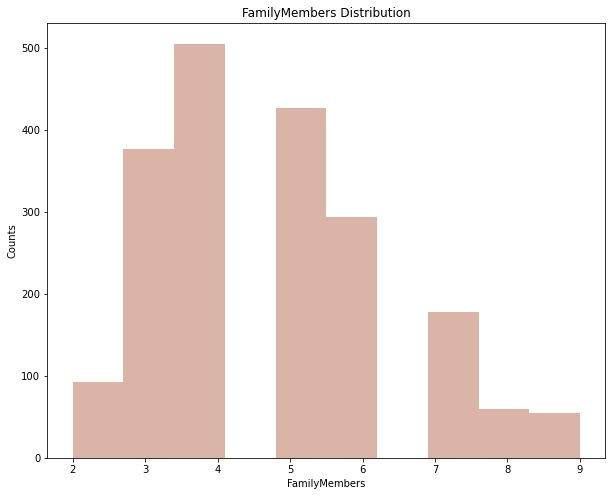

In [32]:
fig = plt.figure(figsize=(10,8))  
plt.hist(df['FamilyMembers'],  density=False,color='#b66a50',alpha=0.5)
plt.xlabel('FamilyMembers')
plt.ylabel('Counts')
plt.title("FamilyMembers Distribution") 

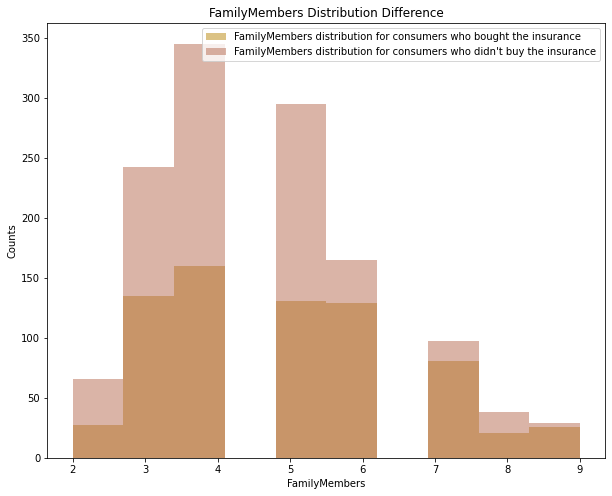

In [33]:
fig = plt.figure(figsize=(10,8))  
plt.hist(buy['FamilyMembers'], color='#B8860B',alpha=0.5)
plt.hist(not_buy['FamilyMembers'], color='#b66a50',alpha=0.5)
plt.xlabel('FamilyMembers')
plt.ylabel('Counts')
plt.legend(['FamilyMembers distribution for consumers who bought the insurance',"FamilyMembers distribution for consumers who didn't buy the insurance"])
plt.title("FamilyMembers Distribution Difference")  
plt.show() 

- Number of consumers who bought this insurance was higher than number of consumers who did not.

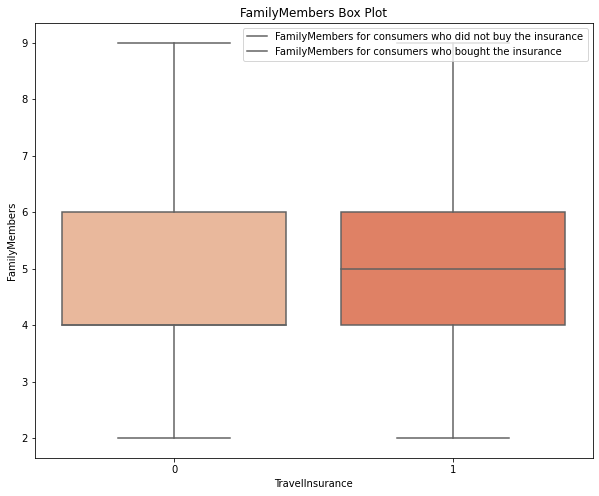

In [35]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='FamilyMembers',x='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['FamilyMembers for consumers who did not buy the insurance',"FamilyMembers for consumers who bought the insurance"],loc='upper right')
plt.title("FamilyMembers Box Plot")  
plt.show()

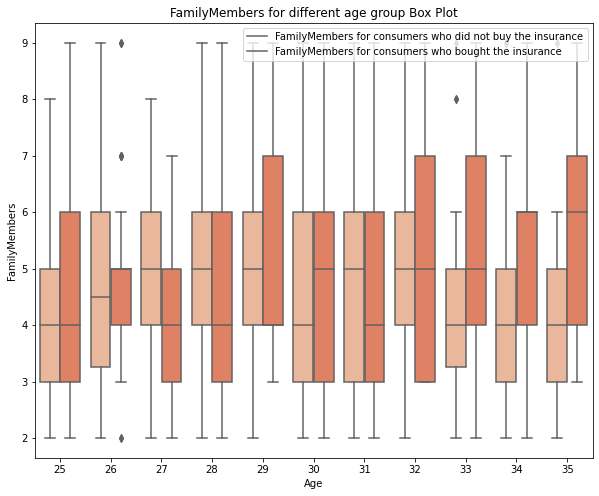

In [42]:
fig = plt.figure(figsize=(10,8))  
sns.boxplot(y='FamilyMembers',x='Age',hue='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['FamilyMembers for consumers who did not buy the insurance',"FamilyMembers for consumers who bought the insurance"],loc='upper right')
plt.title("FamilyMembers for different age group Box Plot")  
plt.show()

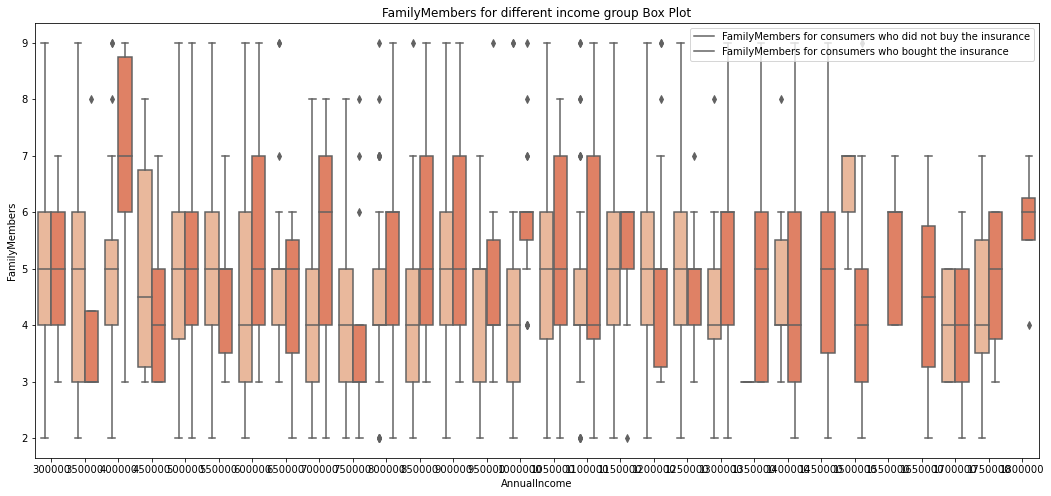

In [7]:
fig = plt.figure(figsize=(18,8))  
sns.boxplot(y='FamilyMembers',x='AnnualIncome',hue='TravelInsurance',data=df,palette=sns.color_palette("rocket_r"))
plt.legend(['FamilyMembers for consumers who did not buy the insurance',"FamilyMembers for consumers who bought the insurance"],loc='upper right')
plt.title("FamilyMembers for different income group Box Plot")  
plt.show()

- Hard to find patterns from the above 2 boxplots.

In [40]:
ttest_ind(buy['FamilyMembers'], not_buy['FamilyMembers'], equal_var = False)

Ttest_indResult(statistic=3.499665212291613, pvalue=0.00048067593805248895)

In [38]:
buy['FamilyMembers'].mean()

4.925352112676056

In [39]:
not_buy['FamilyMembers'].mean()

4.6570086139389195

- Statistics test shows that we are 95% confident that there is a difference between the family size for consumers who bought the insurance and who did not.However, the mean difference was small(4.93-4.66=0.27), and both can be rounded to 5 as the they are family size.->Difference can be ignored.
- The distribution and boxplot shows no difference in family size for consumers who bought the insurance and who did not.


**It is hard to tell whether family size influenced consumer buying behavior.**

## Did Chronic Diseases influence consumers' behavior?

In [12]:
has_chronic=df[df['ChronicDiseases']==1]
no_chronic=df[df['ChronicDiseases']==0]

In [81]:
buy_percent_disease=has_chronic['TravelInsurance'].mean()*100
buy_percent_disease

37.13768115942029

In [82]:
buy_percent_no_disease=no_chronic['TravelInsurance'].mean()*100
buy_percent_no_disease

35.19163763066202

In [35]:
data=[buy_percent_disease,buy_percent_no_disease]

In [36]:
data

[37.13768115942029, 35.19163763066202]

In [40]:
insurance_groupby_disease= {'health condition': ['suffer from disease', 'health'],
        '% of insurance bought': data
       }
insurance_groupby_disease = pd.DataFrame(insurance_groupby_disease)

In [41]:
insurance_groupby_disease

,health condition,% of insurance bought
0,suffer from disease,37.137681
1,health,35.191638


Text(0.5, 1.0, '% of insurance bought group by chronic diseases')

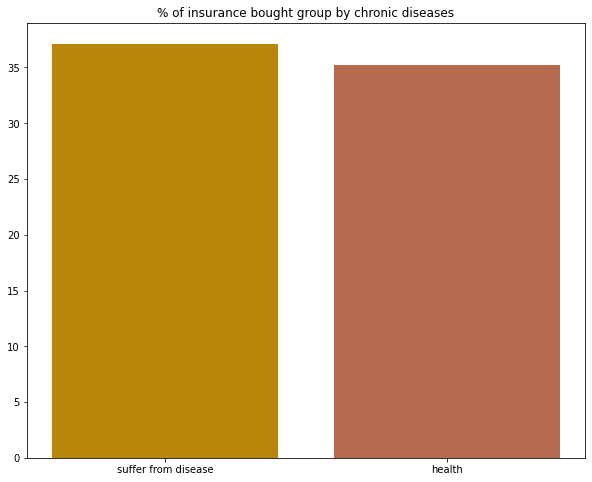

In [45]:
fig = plt.figure(figsize=(10,8))  
color=['#B8860B','#b66a50']
plt.bar(insurance_groupby_disease['health condition'], insurance_groupby_disease['% of insurance bought'],color=color)
plt.title("% of insurance bought group by chronic diseases")  

- For consumers suffering from chronic disease, there was a higher probability that they would buy the insurance.
- The difference in the 2 probabilities is small.

In [46]:
ttest_ind(has_chronic['TravelInsurance'], no_chronic['TravelInsurance'], equal_var = False)

Ttest_indResult(statistic=0.8061481518293234, pvalue=0.4203512679132896)

In [47]:
has_chronic['TravelInsurance'].mean()

0.3713768115942029

In [48]:
no_chronic['TravelInsurance'].mean()

0.3519163763066202

- Statistic test shows that there is not a significant difference in expected purchase probability between consumers who suffered from chronic disease and did not.

- Question：Intuitively, people with chronic diseases are more likely to buy this insurance. But why is the insurance purchase rate irrelevant to whether customers have chronic diseases?

**It seems that whether or not the consumer had a chronic disease did not influence purchase behavior**

- Because this insurance involves covid-19 cover, intuitively,I thought it was easier for people with chronic diseases to buy this insurance since covid-19 had a greater impact on people with diseases. However, it has been proved that whether there is chronic disease has nothing to do with whether the insurance will be purchased.

## Do travel habits affect customers' decisions?

In [74]:
df['FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [75]:
df['EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [83]:
fre=df[df['FrequentFlyer']=='Yes']
no_fre=df[df['FrequentFlyer']=='No']
Travel_abroad=df[df['EverTravelledAbroad']=='Yes']
no_Travel_abroad=df[df['EverTravelledAbroad']=='No']

In [84]:
per_buy_fre=fre['TravelInsurance'].mean()
per_buy_fre


0.5731414868105515

In [85]:
per_buy_nofre=no_fre['TravelInsurance'].mean()
per_buy_nofre

0.3

In [86]:
per_buy_abr=Travel_abroad['TravelInsurance'].mean()
per_buy_abr

0.7842105263157895

In [87]:
per_buy_noabr=no_Travel_abroad['TravelInsurance'].mean()
per_buy_noabr

0.2563783447417548

In [88]:
insurance_groupby_travel_pattern= {'travel pattern': ['frequent flyer','no frequent flyer','travel abroad','no travel abroad'],
        '% of insurance bought': [per_buy_fre,per_buy_nofre,per_buy_abr,per_buy_noabr]
       }
insurance_groupby_travel_pattern = pd.DataFrame(insurance_groupby_travel_pattern)
insurance_groupby_travel_pattern

,travel pattern,% of insurance bought
0,frequent flyer,0.573141
1,no frequent flyer,0.300000
2,travel abroad,0.784211
3,no travel abroad,0.256378


Text(0.5, 1.0, '% of insurance bought group by travel pattern')

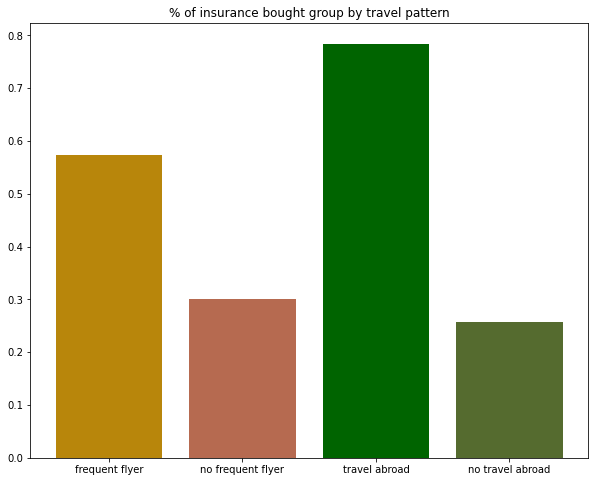

In [91]:
fig = plt.figure(figsize=(10,8))  
color=['#B8860B','#b66a50','#006400','#556B2F']
plt.bar(insurance_groupby_travel_pattern['travel pattern'], insurance_groupby_travel_pattern['% of insurance bought'],color=color)
plt.title("% of insurance bought group by travel pattern")  

In [92]:
ttest_ind(fre['TravelInsurance'], no_fre['TravelInsurance'], equal_var = False)

Ttest_indResult(statistic=10.165661110766711, pvalue=1.489851136563388e-22)

In [93]:
ttest_ind(Travel_abroad['TravelInsurance'], no_Travel_abroad['TravelInsurance'], equal_var = False)

Ttest_indResult(statistic=22.20189289835326, pvalue=4.357756676030003e-80)

- For frequent flyers, there was a higher probability that they would buy the insurance.
- For consumers who had abroad travelling experiences, there was a higher probability that they would buy the insurance.

- Question: 
-- There are many kinds of transportation. It is easy to understand that people who fly frequently would buy this insurance， but why was the purchase rate so low for people were not frequent flyers?->Is it because the company's marketing strategy focuses on airline passengers? More data is needed to explain, such as whether the customer were frequent train travellers.


# Conclusion

Conclusion: \
Potential Customers--Wealth people aged 25 to 35 from private sector/self employed; usually not single and are frequent flyers and have abroad travelling experience\
Suggestion to improve sales:
- Increase the marketing efforts of the above potential customers
- More data and details of the insurance are needed.For example, more data and details of the insurance are needed are needed to understand why the purchase rate of people with chronic diseases was not high? Was it because the covid cover service was not well promoted or the insurance itself did not attract patients with chronic diseases? or other reasons...

# Modeling

## data clean

In [220]:
def yesno_conversion(x):
    new_co=pd.DataFrame(x=='Yes')
    new_col=new_co
    new_col[x=='Yes']=1
    new_col[x=='No']=0

    return new_col
    

In [223]:
def employ_conversion(x):
    new_co=pd.DataFrame(x=='Government Sector')
    new_col=new_co
    new_col[x=='Government Sector']=1
    new_col[x=='Private Sector/Self Employed']=0

    return new_col

In [252]:
# data1=df.loc[:,1]
df['GraduateOrNot_D']=yesno_conversion(df['GraduateOrNot'])
df['FrequentFlyer_D']=yesno_conversion(df['FrequentFlyer'])
df['EverTravelledAbroad_D']=yesno_conversion(df['EverTravelledAbroad'])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,GraduateOrNot_D,FrequentFlyer_D,EverTravelledAbroad_D
0,31,Government Sector,Yes,400000,6,1,No,No,0,1,0,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,1,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,1,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1,1,1,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0,1,0,1
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0,1,0,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1,1,1,1


In [253]:
df['Employment Type_D']=employ_conversion(df['Employment Type'])
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance,GraduateOrNot_D,FrequentFlyer_D,EverTravelledAbroad_D,Employment Type_D
0,31,Government Sector,Yes,400000,6,1,No,No,0,1,0,0,1
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0,1,0,0,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1,1,0,0,0
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0,1,0,0,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1,1,1,1,0
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0,1,0,1,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0,1,0,0,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1,1,1,1,0


In [254]:
df1=df.drop(columns=['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'])
df1

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,GraduateOrNot_D,FrequentFlyer_D,EverTravelledAbroad_D,Employment Type_D
0,31,400000,6,1,0,1,0,0,1
1,31,1250000,7,0,0,1,0,0,0
2,34,500000,4,1,1,1,0,0,0
3,28,700000,3,1,0,1,0,0,0
4,28,700000,8,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,1,0
1983,28,1750000,5,1,0,1,0,1,0
1984,28,1150000,6,1,0,1,0,0,0
1985,34,1000000,6,0,1,1,1,1,0


In [104]:
from sklearn.datasets import load_iris   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [255]:
y = df1['TravelInsurance']
X = df1.drop(['TravelInsurance'], axis=1)

In [256]:
X

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot_D,FrequentFlyer_D,EverTravelledAbroad_D,Employment Type_D
0,31,400000,6,1,1,0,0,1
1,31,1250000,7,0,1,0,0,0
2,34,500000,4,1,1,0,0,0
3,28,700000,3,1,1,0,0,0
4,28,700000,8,1,1,1,0,0
...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,1,1,0
1983,28,1750000,5,1,1,0,1,0
1984,28,1150000,6,1,1,0,0,0
1985,34,1000000,6,0,1,1,1,0


## Normalization

In [257]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = X.columns
d = scaler.fit_transform(X)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,GraduateOrNot_D,FrequentFlyer_D,EverTravelledAbroad_D,Employment Type_D
0,0.6,0.066667,0.571429,1.0,1.0,0.0,0.0,1.0
1,0.6,0.633333,0.714286,0.0,1.0,0.0,0.0,0.0
2,0.9,0.133333,0.285714,1.0,1.0,0.0,0.0,0.0
3,0.3,0.266667,0.142857,1.0,1.0,0.0,0.0,0.0
4,0.3,0.266667,0.857143,1.0,1.0,1.0,0.0,0.0


## Building model

In [258]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)

In [259]:
lr = LogisticRegression(C=1e5)  
lr = lr.fit(X_train,y_train)

In [239]:
from sklearn import metrics

In [260]:
y_hat = lr.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_hat)

In [261]:
accuracy

0.7437185929648241

Text(0.5, 1.0, 'Variances Importances')

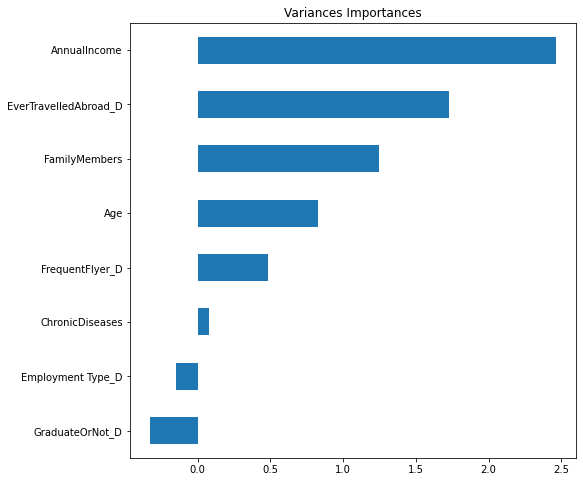

In [262]:
coef_LR = pd.Series(lr.coef_.flatten(),index = X_test.columns,name = 'Var')
plt.figure(figsize=(8,8))
coef_LR.sort_values().plot(kind='barh')
plt.title("Variances Importances")


**The results of the importance of features in logistic regression are similar to findings in the EDA section.\
Annual income is the most important feature.**
